<a href="https://colab.research.google.com/github/Viny2030/HUMAI/blob/main/Introduccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/NLP/1_Introduccion/Introduccion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

## TOKENIZACION DIVIDIR EL TEXTO EN PALABRAS
## TOKEN UNIDAD MAS BASICA EN NLP
## COMO ABORDAN ESTO LOS ALGORITMOS
## NORMALIZACION LLEVAR UN ESPACIO VARIADO A UN ESPACIO TIPIFICADO
## TRANSFORMACIONES A LOS TEXTOS QUE DISMINUYAN LAS FUENTES DE VARIABILIDAD
## PARA PODER IDENTIFICAR INSTANCIAS DEL MISMO SIGNIFICADO
## SACAR ESPACIOS, TILDES, REDUCIR A MINUSCULAS
## LIBRERIA UNIDECODE HABRA MODELOS QUE NO NECESITA N HACER ESO
## .LOWER MINUSCULA .SPLIT('')
## SE PUEDEN HACER OTRAS NORMALIZACIONES VAN A SER MAS SOFISTICADAS, SINGULAR A PLURA , A OTRO GENERO, MAS SOFISTICADO CONOCIMIENTO DE LENGUAJE, CONJUGAR VERBOS EN INFINITIVO, BASE DE VERBOS O SISTEMA QUE PUEDEN HACER ESTO
## TODO ESTO SE HACE PARA QUE FUNCIONE BIEN EL ALGORITMO
## REGEX EXPRESIONES REGULARES , NOS PERMITE HACER BUSQUEDA EN STRINGS, PATRON DE BUSQUEDA, NOS PERMITE , EXTRAER DATOS DE HACER BUSQUEDA, MINERIA, WERB SCRAPPING, LIMPIEZA

# Procesamiento de Lenguaje Natural (NLP)



In [ ]:
#@title Preparamos Dataset de Medios de Latinoamérica
%%capture
!pip install datasets
import pandas as pd
from datasets import load_dataset

data = [] # Changed to a list to store DataFrames
configs = ['ar', 'bo', 'br', 'cl', 'co', 'cr', 'gt', 'hn', 'mx', 'ni', 'pa', 'pe', 'pr', 'py', 'sv', 'uy', 've'] # 'com', 'es'
for c in configs:
  data_ = load_dataset("LeoCordoba/CC-NEWS-ES", c)
  data.append(data_['train'].to_pandas()) # Appending each DataFrame to the list

data = pd.concat(data, ignore_index=True) # Concatenating all DataFrames in the list
# Hacemos "downsampling" tomando maximo n_min para
# los grupos que tienen > n_min, y todos para los que tienen menos
n_min = 1000
df_grouped = data.groupby("country")
df_grouped.groups.values()
frames_of_groups = [x.sample(n_min) if x.shape[0] > n_min else x for y, x in df_grouped]
data = pd.concat(frames_of_groups)

In [ ]:
# Ejecutar la celda de arriba para preparar los datos
print(data.shape[0])
data.sample(2)

15561


,country,text,id
1760033,pr,En el mensaje que comparte junto a una noticia...,7322269
634790,cl,"Chanchullos en la política, en la administraci...",634791


### Definición


El Procesamiento de Lenguaje Natural (NLP por sus siglas en inglés, **Natural Language Processing**) es un campo compartido entre Lingüística y la Computación, incluyendo al Aprendizaje Automático (ML).

Busca, como su nombre lo dice, aplicar sobre el lenguaje natural con herramientas algorítmicas para extraer información, categorizar, traducir, entre otras tareas con el objetivo de fondo el objetivo es lograr que las computadoras "comprendan" el lenguaje,

Puede, o no, usar aprendizaje automático: computar las N palabras más frecuentes en un texto por ejemplo, sería un proceso básico de NLP, que no utiliza ML.

### Tareas Importantes

- Traducción de habla a escritura: la conversión de los fonemas en un audio a su representación escrita (grafema)

- Clasificación:
  - Clasificar oraciones enteras: detectar si un E-mail es spam o no, determinar si una oración es gramaticalmente correcta, análisis de sentimiento, moderación de ofensas, etc.

  - Clasificar cada palabra en una oración: identificar los componentes gramaticales (sustantivo, adjetivo, verbo) o las entidades mencionadas (persona, lugar, organización)

  - Modelado de Tópicos, usado mucho en *social listening*.

- Generación de texto:
  - Generar texto: generar copy para publicidades, escribir noticias, conversar, arte, etc.

  - Resumen abstractivo / resumen extractivo: Extraer de una respuesta de un texto: responder una pregunta dada en base al contexto

  - Traducción: Traducir un texto de un idioma a otro o de un estilo a otro (style transfer)

- Agentes de Diálogo: asistentes virtuales, atención al cliente, chatbots orientados a tareas específicas.

Los dominios de aplicación de estas tecnologías son innumerables, yendo desde aplicaciones triviales hasta aplicaciones como [*Speech2face*](https://speech2face.github.io/)

<center><img src="https://speech2face.github.io/images/teaser_side.jpg" alt="Paris" align="center" width="300px" style="text-align:center;"></center>

# Métodos tradicionales del NLP

En las próximas clases se verá el *estado del arte* basado en Aprendizaje Profundo. Sin embargo, existe un gran repertorio de técnicas más allá de eso. Conocerlas nos servirá para entender esas herramientas, y en muchas ocasiones estas técnicas tradicionales son un buen complemento para preparación y limpieza de datos, o incluso pueden ser la solución deseada si una red neuronal pesada no es conveniente.

Las próximas clases se centrarán en redes usando PyTorch. Hoy conoceremos las siguientes técnias y liberías:

Herramientas de NLP que veremos:
 - Expresiones Regulares con `re`
 - Búsqueda difusa de string con `thefuzz`

Procesos de normalización, preprocesamiento:
 - *Stemming* con `nltk`
 - *Lemmatización* con `spacy`
 - *Stop Words*

Modos de representación:
 - Bolsa de Palabras y
 - TF-IDF `con sklearn`


### Tokenización

Quizás una de las operaciones más básicas que podemos hacer es contar palabras. Imaginemos un caso extremadamente sencillo relacionado al aprendizaje automático. Pensemos en un **clasificador de positividad / negatividad**.

Podríamos usar una regla como:

```si "bueno" está en el texto, clasificamos como positivo```.

Claramente un enfoque tan sencillo va a ser propenso a muchos errores. Iremos viendo cómo aplicarlo y mejorarlo.

La operación de separar los textos en unidades básicas (o ***tokens***) la llamamos ***tokenización***.

In [ ]:
doc1="Jane bought me these books.Jane bought a book for me.She dropped a line to him. Thank you.She sleeps.I sleep a lot.I was born in Madrid the cat was chased by the dog.I was born in Madrid during 1995.Out of all this , something good will come.Susan left afterthe rehearsal. She did it well.She sleeps during the morning, but she sleeps."

In [ ]:
doc1.split(' ') ##  tokenizacion

['Jane',
 'bought',
 'me',
 'these',
 'books.Jane',
 'bought',
 'a',
 'book',
 'for',
 'me.She',
 'dropped',
 'a',
 'line',
 'to',
 'him.',
 'Thank',
 'you.She',
 'sleeps.I',
 'sleep',
 'a',
 'lot.I',
 'was',
 'born',
 'in',
 'Madrid',
 'the',
 'cat',
 'was',
 'chased',
 'by',
 'the',
 'dog.I',
 'was',
 'born',
 'in',
 'Madrid',
 'during',
 '1995.Out',
 'of',
 'all',
 'this',
 ',',
 'something',
 'good',
 'will',
 'come.Susan',
 'left',
 'afterthe',
 'rehearsal.',
 'She',
 'did',
 'it',
 'well.She',
 'sleeps',
 'during',
 'the',
 'morning,',
 'but',
 'she',
 'sleeps.']

In [ ]:
doc2 = 'Usualmente, existe una relación costo-beneficio entre las distintas técnicas.'
doc2.split(' ') ## divide por espacios vacios devuelve lista

['Usualmente,',
 'existe',
 'una',
 'relación',
 'costo-beneficio',
 'entre',
 'las',
 'distintas',
 'técnicas.']

Vemos que en castellano, el lenguaje natural (escrito) puede tener distintas fuentes de variaciones:
 - Mayúsculas
 - Tildes
 - Signos ortográficos
 - Errores de tipeo
 - Variaciones propias del lenguaje como la conjugación
 - Artefactos de la escritura informal como "holaaa"

¿Cómo abordarán esto nuestros algorítmos?

Una solución es la **normalización**: con acepción similar aunque distinta a la que usamos en estadística, va a significar transformar a los strings a representaciones iguales.

Podemos:
- Sacar espacios
- Pasar a minúsculas
- Quitar tildes

In [ ]:
%%capture
!pip install unidecode

In [ ]:
import unidecode
[unidecode.unidecode(w.lower().strip()) for w in doc1.split(' ')]

['jane',
 'bought',
 'me',
 'these',
 'books.jane',
 'bought',
 'a',
 'book',
 'for',
 'me.she',
 'dropped',
 'a',
 'line',
 'to',
 'him.',
 'thank',
 'you.she',
 'sleeps.i',
 'sleep',
 'a',
 'lot.i',
 'was',
 'born',
 'in',
 'madrid',
 'the',
 'cat',
 'was',
 'chased',
 'by',
 'the',
 'dog.i',
 'was',
 'born',
 'in',
 'madrid',
 'during',
 '1995.out',
 'of',
 'all',
 'this',
 ',',
 'something',
 'good',
 'will',
 'come.susan',
 'left',
 'afterthe',
 'rehearsal.',
 'she',
 'did',
 'it',
 'well.she',
 'sleeps',
 'during',
 'the',
 'morning,',
 'but',
 'she',
 'sleeps.']

In [ ]:
import unidecode
[unidecode.unidecode(w.lower().strip()) for w in doc2.split(' ')]  ## minuscula .lower. espacios extra con .strip y despues de las palabras

['usualmente,',
 'existe',
 'una',
 'relacion',
 'costo-beneficio',
 'entre',
 'las',
 'distintas',
 'tecnicas.']

###sofisticacion  de las normalizaciones, pasar al mismo genero, conjugar los verbos en infinitivo ,l procedmientos pára que el algoritmo funcione bien

Otras normalizaciones más sofisticadas serían:
- Pasar de plural a singular
- Convertir el género de la palabra
- Conjugar los verbos en infinitivo

¡Es de esperarse que esto requiera métodos más complejos!

Vemos que con la tokenización anterior, todavía tenemos palabras con signos de puntuación pegados. Armar nuestro vocabulario es un paso clave para nuestros modelos de *Machine Learning*.

https://github.com/institutohumai/cursos-python/blob/master/Automatizacion/Automatizaci%C3%B3n_2/clase_automatizacion_2_ejercicios.ipynb


## Expresiones regulares


También conocido popularmente como **RegEx**. Es un mini lenguaje de programación diseñado para realizar búsquedas en strings. Son extremadamente útiles para:
- Extraer datos de distintos tipos de archivos, texto o con otro tipo de codificación.
- Web scraping: como veremos en las próximas clases, las regex son un buen método para encontrar la información que se necesita en un sitio web.
- Limpieza de datos: herramienta fundamental en el repertorio del científico de datos para limpiar datos quitando caracteres "ruidosos", o armando nuevos "features" según la presencia o no de cierto texto.


Para profundizar en esta importante herramienta, ver la [clase de Expresiones Regulares](https://github.com/institutohumai/cursos-python/tree/master/Automatizacion) del curso de Automatización.


Recursos útiles para regex:

- [Sitio para armar RegEx online](https://regexr.com/)
- [Alternativa](https://regex101.com/)
- [CheatSheet](https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf)


Python utiliza la libreria llamada **re** para todo lo relacionado a regular expressions

In [ ]:
import re
tokens = re.findall(r'\w+|\d+', doc1)  # tokenizacion por palabras o numeros por separado  ENCONTRAME LAS COINCIDENCIAS DE ESTE PATRON EN ESTE TEXTO w + d+
tokens

['Jane',
 'bought',
 'me',
 'these',
 'books',
 'Jane',
 'bought',
 'a',
 'book',
 'for',
 'me',
 'She',
 'dropped',
 'a',
 'line',
 'to',
 'him',
 'Thank',
 'you',
 'She',
 'sleeps',
 'I',
 'sleep',
 'a',
 'lot',
 'I',
 'was',
 'born',
 'in',
 'Madrid',
 'the',
 'cat',
 'was',
 'chased',
 'by',
 'the',
 'dog',
 'I',
 'was',
 'born',
 'in',
 'Madrid',
 'during',
 '1995',
 'Out',
 'of',
 'all',
 'this',
 'something',
 'good',
 'will',
 'come',
 'Susan',
 'left',
 'afterthe',
 'rehearsal',
 'She',
 'did',
 'it',
 'well',
 'She',
 'sleeps',
 'during',
 'the',
 'morning',
 'but',
 'she',
 'sleeps']

In [ ]:
import re
tokens1 = re.findall(r'\w+|\S', doc1)  # Busca palabras o cualquier carácter no espacio en blanco
tokens1

['Jane',
 'bought',
 'me',
 'these',
 'books',
 '.',
 'Jane',
 'bought',
 'a',
 'book',
 'for',
 'me',
 '.',
 'She',
 'dropped',
 'a',
 'line',
 'to',
 'him',
 '.',
 'Thank',
 'you',
 '.',
 'She',
 'sleeps',
 '.',
 'I',
 'sleep',
 'a',
 'lot',
 '.',
 'I',
 'was',
 'born',
 'in',
 'Madrid',
 'the',
 'cat',
 'was',
 'chased',
 'by',
 'the',
 'dog',
 '.',
 'I',
 'was',
 'born',
 'in',
 'Madrid',
 'during',
 '1995',
 '.',
 'Out',
 'of',
 'all',
 'this',
 ',',
 'something',
 'good',
 'will',
 'come',
 '.',
 'Susan',
 'left',
 'afterthe',
 'rehearsal',
 '.',
 'She',
 'did',
 'it',
 'well',
 '.',
 'She',
 'sleeps',
 'during',
 'the',
 'morning',
 ',',
 'but',
 'she',
 'sleeps',
 '.']

In [ ]:
import re
tokens2 = re.findall(r'[A-Z][a-z]+|[A-Z]+|[a-z]+', doc1)  # Busca palabras con mayúscula inicial, palabras totalmente en mayúscula o minúscula
tokens2

['Jane',
 'bought',
 'me',
 'these',
 'books',
 'Jane',
 'bought',
 'a',
 'book',
 'for',
 'me',
 'She',
 'dropped',
 'a',
 'line',
 'to',
 'him',
 'Thank',
 'you',
 'She',
 'sleeps',
 'I',
 'sleep',
 'a',
 'lot',
 'I',
 'was',
 'born',
 'in',
 'Madrid',
 'the',
 'cat',
 'was',
 'chased',
 'by',
 'the',
 'dog',
 'I',
 'was',
 'born',
 'in',
 'Madrid',
 'during',
 'Out',
 'of',
 'all',
 'this',
 'something',
 'good',
 'will',
 'come',
 'Susan',
 'left',
 'afterthe',
 'rehearsal',
 'She',
 'did',
 'it',
 'well',
 'She',
 'sleeps',
 'during',
 'the',
 'morning',
 'but',
 'she',
 'sleeps']

In [ ]:
import re

def tokenize(text, pattern):
  """Tokeniza un texto utilizando una expresión regular.

  Args:
    text: El texto a tokenizar.
    pattern: La expresión regular a utilizar.

  Returns:
    Una lista con los tokens encontrados.
  """
  return re.findall(pattern, text)

# Ejemplo de uso:
doc1="Jane bought me these books.Jane bought a book for me.She dropped a line to him. Thank you.She sleeps.I sleep a lot.I was born in Madridthe cat was chased by the dog.I was born in Madrid during 1995.Out of all this , something good will come.Susan left afterthe rehearsal. She did it well.She sleeps during the morning, but she sleeps."
tokens4 = tokenize(doc1, r'\w+|\d+|\S+')  # Tokeniza palabras, números y otros caracteres
print(tokens4)

['Jane', 'bought', 'me', 'these', 'books', '.Jane', 'bought', 'a', 'book', 'for', 'me', '.She', 'dropped', 'a', 'line', 'to', 'him', '.', 'Thank', 'you', '.She', 'sleeps', '.I', 'sleep', 'a', 'lot', '.I', 'was', 'born', 'in', 'Madridthe', 'cat', 'was', 'chased', 'by', 'the', 'dog', '.I', 'was', 'born', 'in', 'Madrid', 'during', '1995', '.Out', 'of', 'all', 'this', ',', 'something', 'good', 'will', 'come', '.Susan', 'left', 'afterthe', 'rehearsal', '.', 'She', 'did', 'it', 'well', '.She', 'sleeps', 'during', 'the', 'morning', ',', 'but', 'she', 'sleeps', '.']


In [ ]:
# Tokenización simple con RegEx
import re
re.findall('\w+', doc1)  ## UNO O MAS DE CUALQUIER CARACTER ALFANUMERICO

['Jane',
 'bought',
 'me',
 'these',
 'books',
 'Jane',
 'bought',
 'a',
 'book',
 'for',
 'me',
 'She',
 'dropped',
 'a',
 'line',
 'to',
 'him',
 'Thank',
 'you',
 'She',
 'sleeps',
 'I',
 'sleep',
 'a',
 'lot',
 'I',
 'was',
 'born',
 'in',
 'Madridthe',
 'cat',
 'was',
 'chased',
 'by',
 'the',
 'dog',
 'I',
 'was',
 'born',
 'in',
 'Madrid',
 'during',
 '1995',
 'Out',
 'of',
 'all',
 'this',
 'something',
 'good',
 'will',
 'come',
 'Susan',
 'left',
 'afterthe',
 'rehearsal',
 'She',
 'did',
 'it',
 'well',
 'She',
 'sleeps',
 'during',
 'the',
 'morning',
 'but',
 'she',
 'sleeps']

In [ ]:
doc2

'Usualmente, existe una relación costo-beneficio entre las distintas técnicas.'

In [ ]:
# Tokenización simple con RegEx
import re
re.findall('\w+', doc2)  ### motor de expresiones regulares llega a la coma no lo incluye

['Usualmente',
 'existe',
 'una',
 'relación',
 'costo',
 'beneficio',
 'entre',
 'las',
 'distintas',
 'técnicas']

## estudiar

## NLTK

La librería [Natural Languaje Toolkit](https://www.nltk.org/) es un *de facto* para NLP en Python para diversos idiomas. No solo contiene algoritmos para operaciones de NLP si no también corpus de textos y vocabulario organizado como [WordNet](https://wordnet.princeton.edu).

In [ ]:
# Tokenización con NLTK
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
tokens4 = nltk.word_tokenize(doc1)
print(tokens4)

['Jane', 'bought', 'me', 'these', 'books.Jane', 'bought', 'a', 'book', 'for', 'me.She', 'dropped', 'a', 'line', 'to', 'him', '.', 'Thank', 'you.She', 'sleeps.I', 'sleep', 'a', 'lot.I', 'was', 'born', 'in', 'Madridthe', 'cat', 'was', 'chased', 'by', 'the', 'dog.I', 'was', 'born', 'in', 'Madrid', 'during', '1995.Out', 'of', 'all', 'this', ',', 'something', 'good', 'will', 'come.Susan', 'left', 'afterthe', 'rehearsal', '.', 'She', 'did', 'it', 'well.She', 'sleeps', 'during', 'the', 'morning', ',', 'but', 'she', 'sleeps', '.']


In [ ]:
tokens = nltk.word_tokenize(doc2)
print(tokens)

['Usualmente', ',', 'existe', 'una', 'relación', 'costo-beneficio', 'entre', 'las', 'distintas', 'técnicas', '.']


## la puntuacion la devuelve aparte signo de exclamacion

##herramientas de nlp de algoritmos y otros algoritmos

## Distancia de edición

Para afrontar el "ruido" en nuestros textos, tenemos una importante herramienta: la distancia de edición.

También llamada Distancia de Levenshtein, nos dice la cantidad mínima de operaciones requerida para llevar de un string al otro. Expresandola de una manera sencilla (y en su versión sin normalizar entre 0 y 1) podemos explicarla así:

$$\mathit{L} = S+D+I$$ / N

Donde $S$ = sustitución, $D$ = Eliminación, $I$ = inserción (de un caracter).
------------------------------------------
                    N

Como en muchos idiomas la raíz importa más que el resto de la palabra, a veces se usa la métrica Jaro Winkler que pondera más los caracteres iniciales.

In [ ]:
%%capture
!pip install pyjarowinkler
from nltk.metrics import edit_distance
from pyjarowinkler import distance as jwdist

In [ ]:
# Definimos una lista de tuplas de palabras
palabras = [("pero", "perro"),("pero", "pierdo"), ("nueve", "mueve"),  ("totalmente","diferentes"), ("pero", "basta")]

# Calculamos las metricas de distancia pasando cada tupla como argumentos a levdist() y get_jaro_distance()
for x,y in palabras:
    print(f"'{x}' vs '{y}':")
    print("Distancia Levenshtein ->", edit_distance(x,y)) ## EDIT DISTANCE DE NLTK
    print("Similitud Jaro Winkler ->",jwdist.get_jaro_distance(x,y)) ## en % la distancia de edicion
    print("-"*40) ## inserciones en levenstein , cant de operaciones para llegar de un string a otro

'pero' vs 'perro':
Distancia Levenshtein -> 1
Similitud Jaro Winkler -> 0.95
----------------------------------------
'pero' vs 'pierdo':
Distancia Levenshtein -> 2
Similitud Jaro Winkler -> 0.9
----------------------------------------
'nueve' vs 'mueve':
Distancia Levenshtein -> 1
Similitud Jaro Winkler -> 0.87
----------------------------------------
'totalmente' vs 'diferentes':
Distancia Levenshtein -> 7
Similitud Jaro Winkler -> 0.52
----------------------------------------
'pero' vs 'basta':
Distancia Levenshtein -> 5
Similitud Jaro Winkler -> 0.0
----------------------------------------


### JARO WINKLER BAJA DEBIDO A LA MAYOR DISTANCIA LEVENSTEIN

## Búsqueda difusa de strings (fuzzy string matching)

Técnica muy útil para tener en el repertorio, nos permite encontrar coincidencias que no son exactas. En el caso más sencillo, la búsqueda difusa nos devolverá un puntaje de similitud entre los strings relacionada a las diferencias entre los caracteres. Existen variaciones que consideran cuántas unidades (palabras, tokens) coinciden, que ordenan la oración antes, o que borran repetidos.

## BUSQUEDAS NO SON EXACTAS de levenstein

In [ ]:
%%capture
!pip install thefuzz[speedup]
from thefuzz import process, fuzz

In [ ]:
def get_match(string, lista_strings):  ## funcion encapsulada la busqueda del string
    """Para buscar coincidencias entre nombre con los nombres"""
    mejor_match, puntaje = process.extractBests(string.strip(), lista_strings, scorer=fuzz.token_set_ratio)[0]
    return mejor_match, puntaje

In [ ]:
# Completar
busqueda = 'Pebro'
candidatos = 'María, Fabio, Paula, Natu, Pedro, Miguel'.split(', ')

get_match(busqueda, candidatos) ## nombre y lista de candidatos

('Pedro', 80)

# Hacia el ML: Representación

Lo anterior nos puede servir para un sinfín de algorítmos útiles de NLP. En el caso del *Machine Learning* (ML) para usar nuestro modelo (o para cualquier operación vectorial), tendremos que llevar a nuestros datos a una representación matricial. Las maneras de lograr esto se pueden denominar "**vectorizar**".


En un caso de querer **clasificar artículos** en algunas categorías predeterminadas, una tabla simple de ejemplo se podría ver así:

## LLEVAR LOS TEXTOS A FILAS Y COLUMNAS VECTOR OBJETIVO O VARIABLE OBJETIVO EN SUPERVISADO

# ***shallow machine learning***

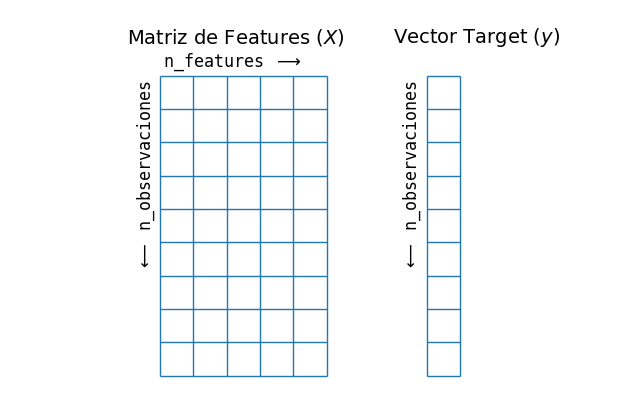

In [ ]:
#@title Matriz de Features
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.axis('equal')

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(-1, -1, "Matriz de Features ($X$)", size=14)
ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 0.1, r'$\longleftarrow$ n_observaciones', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=8, xmax=9, lw=1)
ax.text(7, -1, "Vector Target ($y$)", size=14)
ax.text(7.9, 0.1, r'$\longleftarrow$ n_observaciones', rotation=90,
        va='top', ha='right', **font_prop)

ax.set_ylim(10, -2);

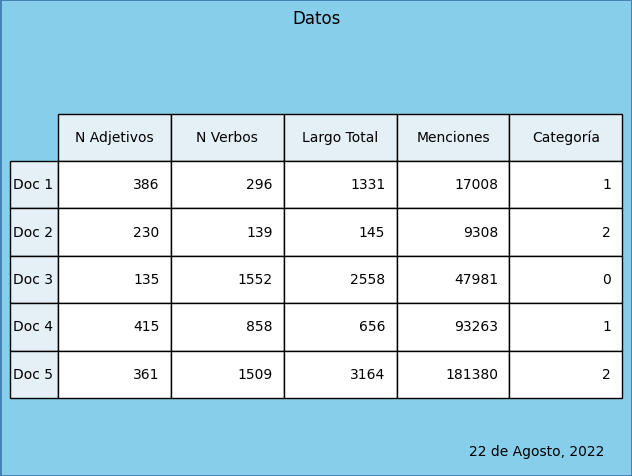

In [ ]:
#@title Tabla Ejemplo
import numpy as np
import matplotlib.pyplot as plt
title_text = 'Datos'
footer_text = '22 de Agosto, 2022'
fig_background_color = 'skyblue'
fig_border = 'steelblue'
data_ =  [
            [         'N Adjetivos', 'N Verbos', 'Largo Total', 'Menciones', 'Categoría'],
            [ 'Doc 1',  386, 296,   1331,  17008,  1],
            ['Doc 2',  230, 139,   145,   9308, 2],
            ['Doc 3',  135,  1552,  2558,  47981, 0],
            ['Doc 4',  415,  858,  656,  93263,  1],
            ['Doc 5', 361, 1509,  3164,  181380,  2],
        ]
column_headers = data_.pop(0)
row_headers = [x.pop(0) for x in data_]

cell_text = []
for row in data_:
    cell_text.append([f'{x}' for x in row])
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
plt.figure(linewidth=2,
           edgecolor=fig_border,
           facecolor=fig_background_color,
           tight_layout={'pad':1},
           #figsize=(5,3)
          )
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center')
the_table.scale(1, 2.5)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.suptitle(title_text)
plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=10, weight='light')
plt.draw()

Para operar sobre la información de texto directamente, el enfoque tradicional más sencillo es la **bolsa de palabras**. Vamos a crearla con sci-kit learn:

###count vectorizer matriz de frecuencia de terminos , contar cuantas veces aparece cada palabra

## matriz de termino y frecuencia

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Instanciamos el CV
vec = CountVectorizer()
doc1="Jane bought me these books.Jane bought a book for me.She dropped a line to him. Thank you.She sleeps.I sleep a lot.I was born in Madridthe cat was chased by the dog.I was born in Madrid during 1995.Out of all this , something good will come.Susan left afterthe rehearsal. She did it well.She sleeps during the morning, but she sleeps."


# Definimos una lista con todos los strings
texto = [doc1]

# Ajustamos el CV y transformamos los datos
X1 = vec.fit_transform(texto)

In [ ]:
import pandas as pd

# Re-fit the vectorizer to get the correct feature names for X1
# This assumes 'textos' still contains the document used to create X1
vec.fit(texto)

# Now create the DataFrame
pd.DataFrame(data=X1.todense(), columns=vec.get_feature_names_out()).style.background_gradient()  #3 cuenta cuantas veces aparece cada palabra

,1995,afterthe,all,book,books,born,bought,but,by,cat,chased,come,did,dog,dropped,during,for,good,him,in,it,jane,left,line,lot,madrid,madridthe,me,morning,of,out,rehearsal,she,sleep,sleeps,something,susan,thank,the,these,this,to,was,well,will,you
0,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,2,1,1,1,2,1,2,1,1,1,1,1,2,1,1,1,1,5,1,3,1,1,1,2,1,1,1,3,1,1,1


## 2 documentos asunciones que estamos tomando

In [ ]:
# Instanciamos el CV
vec = CountVectorizer()

doc1 = 'la matriz de frecuencias otorga información del contenido de un documento'
doc2 = 'las palabras que aparecen en un documento reflejan sus tópicos'

# Definimos una lista con todos los strings
textos = [doc1, doc2]

# Ajustamos el CV y transformamos los datos
X = vec.fit_transform(textos)  ## ajusta los parametros de coount vectorizer para darnos la matriz con los textos vectorizados

Podemos volcar este resultado en un `DataFrame`. Para obtener el encabezado de las columnas, vamos a utilizar el método `get_feature_names_out()`, propio del vectorizador.

In [ ]:
import pandas as pd
pd.DataFrame(data = X.todense(), columns = vec.get_feature_names_out()).style.background_gradient()

,aparecen,contenido,de,del,documento,en,frecuencias,información,la,las,matriz,otorga,palabras,que,reflejan,sus,tópicos,un
0,0,1,2,1,1,0,1,1,1,0,1,1,0,0,0,0,0,1
1,1,0,0,0,1,1,0,0,0,1,0,0,1,1,1,1,1,1


##refleja el contenido de un documento que pueden identificar crece con nuevas palabras del vocabulario.

Una vez que tenemos nuestros datos ordenados, podemos ajustar nuestro modelo de aprendizaje automático aproximadamente así:

```python
from sklearn.familia_de_modelos import Modelo
mi_modelo = Modelo(hiperparámetros)
mi_modelo.fit(X, y)

predicción = mi_modelo.predict(nuevo_X)
```

Para ajustar nuestros modelos de machine learning, vamos a tener nuestra matriz de features **X** y un vector **y** (en el caso de ML supervisado), donde **X** tiene la forma ``(n_observaciones, n_variables)`` e **y** ``(n_observaciones)``

###que limitaciones o problemas traera, la matriz crece con cada palabra se agrega NUEVA DEL VOCABULARIO O VARIACIONES DE CADA PALABRA, crece muy rapido, LAS PALABRAS TIPICAS OCOMO DE APARECE  varias veces alli aparece TF_IDF

##matriz TF-IDF COMPENSA LA APARICION, NORMALIZA CUANTAS VECES APARECE Y HACE 2 normalizaciones ponderar la frecuencia relativa de cada documentos y en cuales documentos aparece, cuando es mas informativa una palabra, en cambio muy poco informativa aparece en la misma proporcion , pone frecuencia relativa , dividiendo por la aparicion total y en cuantos documentos aparece, tecnica muy efectiva base donde construimos los algoritmos

# **matriz de termino y frecuencia**

# TF-IDF

**Term frequency-inverse document frequency (TF–IDF)** es una técnica alternativa que computa la frecuencia relativa de cada palabra por documento, ponderada por la inversa de su frecuencia relativa a lo largo del *corpus* (colección de documentos). Este método funciona mejor con ciertos algoritmos de clasificación, y es ámpliamente utilizada

## frecuencia que aparece cada palabra

Vamos a calcular las matrices de ocurrencias de términos usando sklearn.

Ámbas clases primero construyen el vocabulario total, y luego:  
- **CountVectorizer** nos devuelve la frecuencia absoluta de cada término por cada documento.
- [**TF-IDF**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf): calcula la frecuencia de cada término por documento, y normaliza por el total de documentos donde el término aparece.

$${tf} (t,d)={\frac {f_{t,d}}{\sum _{t'\in d}{f_{t',d}}}}$$

$$
idf( t, D ) = log \frac{ \text{| } D \text{ |} }{ 1 + \text{| } \{ d \in D : t \in d \} \text{ |} }
$$


$$ tfidf( t, d, D ) = tf( t, d ) \times idf( t, D )
$$


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(textos)
pd.DataFrame(data = X.todense(),
             columns = vec.get_feature_names_out()).style.background_gradient()

,aparecen,contenido,de,del,documento,en,frecuencias,información,la,las,matriz,otorga,palabras,que,reflejan,sus,tópicos,un
0,0.000000,0.288525,0.577050,0.288525,0.205288,0.000000,0.288525,0.288525,0.288525,0.000000,0.288525,0.288525,0.000000,0.000000,0.000000,0.000000,0.000000,0.205288
1,0.333102,0.000000,0.000000,0.000000,0.237005,0.333102,0.000000,0.000000,0.000000,0.333102,0.000000,0.000000,0.333102,0.333102,0.333102,0.333102,0.333102,0.237005


### **contar cuantas veces aparece cada palabra refleja el contenido del documento, que problemas traera este enfoque , crece con cada palabra nueva del vocabulario esta matriz tiene cuestiones como la palabra de y no refleja el contenido del documento alli aparece la matriz tf-idf
 term frecuency-inverse document frecuency-compensa eso hace 2 normalizaciones, ponderar la frecuencia relativa con, de la palabra en cada documento y cuantas veces aparece en los otros documentos, palabra muy informativa, aparece muchas veces en un documento, si siempre en la misma proprocion enm todos los documentos, dividiendo por la aparicion total y cuantos documentos
 LO TRANSFORMA EN FLOAT % , VECTORIZACION DATOS BASE SOBRE DONDE CONSTRUIMOS LOS ALGORITMOS **

### TEMA DE SEMANTICA DE LOS TEXTOS
TOMAMOS LOS VECTORES Y QUE TEXTOS SE PARECEN ENTRE SI SISTEMAS DE PRODUCCION ..

## Similitud coseno

Recordando rápidamente la métrica de similitud coseno, podemos utilizarla en conjunto con TF-IDF para calcular similitud entre textos!

$$sim(\pmb x, \pmb y) = \frac {\pmb x \cdot \pmb y}{||\pmb x|| \cdot ||\pmb y||}$$

Con los elementos vistos ya podemos construir el algoritmo de Análisis Semántico Latente, que fue de vanguardia y muy exitoso por muchos años.

Para un ejemplo de TF-IDF con similitud coseno, en el contexto de sistemas de recomendación, véase [la última clase de Machine Learning](https://github.com/institutohumai/cursos-python).

SEMANTICA DE DISTINTOS TEXTOS Y COMO APARECEN ENTRE SI SE TIENE EL lSA analisis semantico , usando tf-idf, similitud coseno , en el contenido en la semantica de distintos textos si se parecen entre si, sistemas en produccion, ultima clase de machine learning.se tiene el analisis semantico latente lsa, se construye la matriz tf-idf, se hace reduccion de dimensionalidad de aprendizaje no supervisado, se puede computar simuilitud coseno entre los vectores,



Hipotesis distribucional, el significado de la palabra se puede identificar a partir de su contextos, palabras que identifican contextos parecidos, el significado de la palabra se define por el contexto, PALABRAS TIENEN CONTEXTOS SIMILARES, el significado mismo se establece en el contexto que aparece

## construir la matriz con una bolsa de palabras, no se considera el orden, palabras al lado, estamos perdiendo que palabras por si solas no significan, palabras compuestas..

palabras que no significan, LA RIOJA. ITALOAMERICANO, juntas singnificado, en tf -idf, perdemos el significado.

## N-gramas

Muchas veces la unidad lingüística no es una palabra si no que es una palabra compuesta, ya sea en un nombre (ej. "La Rioja") como en palabras compuestas ("italo-americano"). Tomando palabras sueltas, esos significados se pierden.
Para contemplar esto, se pueden tomar combinaciones de N palabras: **n-gramas**.

##solucion  a esto los n gramas buscan combinacion de palabras en lugar de palabras sueltas

## si tomamos 3 gramas es la dimensionallidad de nuestra matriz crece enormemente, memoria, complica proceso , proceso seleccion de variable, tomar los ngramas de umbral de frecuencia

retenemos el significado, tomamos 3 gramas, la dimensionalidad de la matriz de vocabulario crece, podemos hacer proceso de seleccion de variables, n gramas de umbral de frecuencia, especificar procedimientos

In [ ]:
data['text'] = data['text'].apply(lambda x: x[:1000])  ##

## que n-gramas superan este umbral de frecuencia y son los mas preponderantes

##min_df min of fredoom cuantas veces aparecen 20
## ngram_range 2 a 3 palabras armamos la matriz de fecuencia por palabra, frecuencia total y en cuantos textos, vectorizar para aplicar modelos de machine learning

In [ ]:
# Definimos una lista con los documentos
textos = data['text']

# Instanciamos un CountVectorizer con una tupla indicando el rango de los n-gramas a considerar
vectorizer = CountVectorizer(ngram_range=(2,3), min_df=20) ### , combinaciones de 2 o 3 palabras y minimos grados de libertad cuantas apariciones debe superar cada palabra con las que aparece 20 veces o fraccion

# Usamos .fit_transform() para ajustar el CV y transformar los datos
X = vectorizer.fit_transform(textos)
print(X.toarray())

# Usando .get_feature_names_out() podemos acceder al indice de palabras
print(vectorizer.get_feature_names_out())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00 de' '00 de la' '00 en' ... 'únicamente una nueva' 'único de'
 'único que']


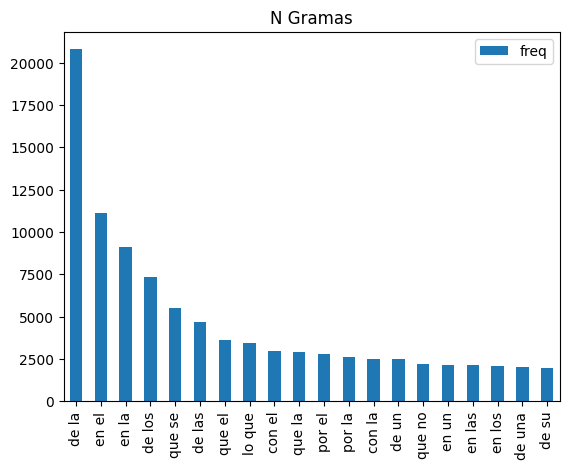

In [ ]:
pd.DataFrame(X.sum(axis=0).T,
            index=vectorizer.get_feature_names_out(),
            columns=['freq']).sort_values(by='freq',
                                          ascending=False)[:20].plot(kind='bar',title='N Gramas');

## palabras mas frecuentes, las combinaciones de los contenidos de las noticias

## no nos aporto informacion , sobre los contenidos de las noticias , proximo paso bolsa de palabras tf-idf, sacar las palabras que no aportan informacion

## Stop Words



## saco las palabras mas frecuentes,

In [ ]:
!pip install stop_words
import stop_words
# Usamos stop words del español
stop_words = stop_words.get_stop_words('es')

## tiene conectores , verbos, lista de stopwords y limpiar la matriz

In [ ]:
stop_words ## lista de stop words para retener las palabras mas informativas

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

## ajustamos la matriz

In [ ]:
# Instanciamos un CountVectorizer con una tupla indicando el rango de los n-gramas a considerar
vectorizer = CountVectorizer(ngram_range=(2,3), min_df=10, stop_words=stop_words)  ### ajustamos el objeto considere 2 0 3 ngramas, aparicion minima 10 veces, y reduzca los stopwords se la pasa al constructor de este objeto

# Usamos .fit_transform() para ajustar el CV y transformar los datos
X = vectorizer.fit_transform(textos)

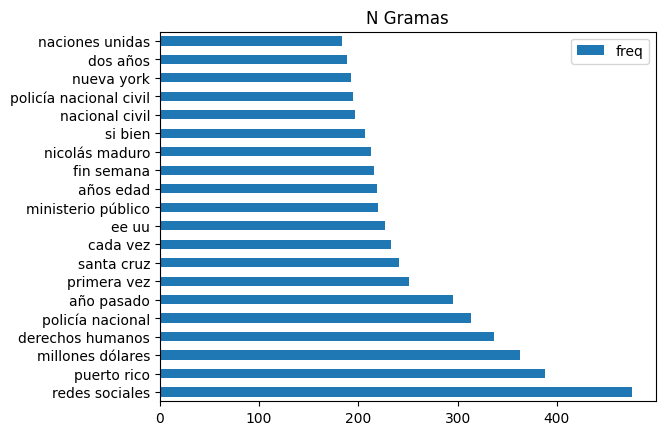

In [ ]:
import matplotlib.pyplot as plt  ## frecuencia de las palabras conjunto de palabras usando los ngramas para refelejar contenido
pd.DataFrame(X.sum(axis=0).T,
            index=vectorizer.get_feature_names_out(),
            columns=['freq']).sort_values(by='freq',
                                          ascending=False)[:20].plot(kind='barh',title='N Gramas');

## AHORA TENEMOS LAS PALABRAS MAS FECUENTES, VEMOS QUE SON CONJUNTOS DE PALABRAS SI NO USAMOS LOS NGRAMAS Y LA REMOCION DE LOS STOPWORDS

## conjuntos de palabras sin usar n-gramas no encontramos los terminos mas informativos que generan contenido

## Stemming--Stemm raiz de las palabras

##El stemming es una técnica de preprocesamiento de textos en el procesamiento del lenguaje natural (PLN) que consiste en reducir las palabras flexionadas a su raíz o lema,

# **El stemming y la lematización son técnicas de preprocesamiento de texto que reducen las variantes de palabras a una forma base.**

# **El stemming y la lematización son técnicas de preprocesamiento de textos en el procesamiento del lenguaje natural (PLN). En concreto, reducen las formas flexionadas de las palabras en un conjunto de datos de texto a una palabra raíz común o forma de diccionario, también conocida como "lema" en lingüística computacional.1**

# **El stemming y la lematización son especialmente útiles en los sistemas de recuperación de información, como los motores de búsqueda, donde los usuarios pueden enviar una consulta con una palabra (por ejemplo, meditar) pero esperar resultados que utilicen cualquier forma declinada de la palabra (por ejemplo, medita, meditación, etc.). El stemming y la lematización también tienen como objetivo mejorar el procesamiento de texto en los algoritmos de machine learning.**



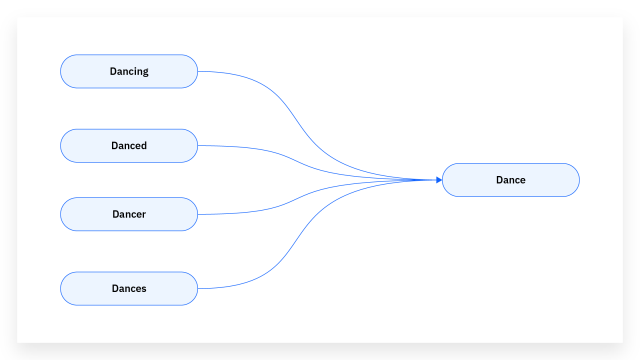

# **El stemming frente a la lematización**
El stemming y la lematización funcionan como una etapa en los oleoductos de minería de texto que convierten los datos de texto sin procesar en un formato estructurado para su procesamiento automático. Tanto el stemming como la lematización eliminan los afijos de las formas de las palabras declinadas, dejando solo una forma raíz.4 Estos procesos equivalen a eliminar caracteres del principio y el final de los tokens de palabra. Las raíces resultantes, o palabras base, se transmiten para su posterior procesamiento. Más allá de esta similitud básica, el stemming y la lematización tienen diferencias clave en la forma en que reducen las diferentes formas de una palabra a una forma base común.

construir dentro de la bolsa de palabras, recortar a la raiz de las palabras

In [ ]:
# Instanciamos SnowballStemmer() de NLTK en español
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [ ]:
# Instanciamos SnowballStemmer() de NLTK en español
from nltk.stem import SnowballStemmer
stemmer1 = SnowballStemmer('english')

In [ ]:
# Aplicamos el stemming para cada palabra pasando el string al metodo .stem()
ejemplo1 = "Jane bought me these books.Jane bought a book for me.She dropped a line to him. Thank you.She sleeps.I sleep a lot.I was born in Madrid the cat was chased by the dog.I was born in Madrid during 1995.Out of all this , something good will come.Susan left afterthe rehearsal. She did it well.She sleeps during the morning, but she sleeps."
[stemmer1.stem(i) for i in nltk.word_tokenize(ejemplo1)]

['jane',
 'bought',
 'me',
 'these',
 'books.jan',
 'bought',
 'a',
 'book',
 'for',
 'me.sh',
 'drop',
 'a',
 'line',
 'to',
 'him',
 '.',
 'thank',
 'you.sh',
 'sleeps.i',
 'sleep',
 'a',
 'lot.i',
 'was',
 'born',
 'in',
 'madrid',
 'the',
 'cat',
 'was',
 'chase',
 'by',
 'the',
 'dog.i',
 'was',
 'born',
 'in',
 'madrid',
 'dure',
 '1995.out',
 'of',
 'all',
 'this',
 ',',
 'someth',
 'good',
 'will',
 'come.susan',
 'left',
 'afterth',
 'rehears',
 '.',
 'she',
 'did',
 'it',
 'well.sh',
 'sleep',
 'dure',
 'the',
 'morn',
 ',',
 'but',
 'she',
 'sleep',
 '.']

In [ ]:
# Aplicamos el stemming para cada palabra pasando el string al metodo .stem()
ejemplo = 'mirar miraré codear hacer hachas'
[stemmer.stem(i) for i in nltk.word_tokenize(ejemplo)]

['mir', 'mir', 'cod', 'hac', 'hach']

## mirar y mirare comparten la misma matriz, tiempo verbal de estas palabras, lo gra unificar cierta informacion, normalizar estas palabras

¿Qué ventajas y desventajas piensan que conlleva el uso de *stemming*?

## estamos perdiendo informacion, el tiempo verbal de estas palabras es importante, afecta al algoritmo, tenemos una manera de normalizar las palabras , lemmatizacion

lematizacion sin genero sin numero

# **###el stemming y la lematización tienen sus respectivas desventajas. Como se ilustra con el ejemplo de Hamlet, el stemming es un proceso relativamente heurístico y basado en reglas de eliminación de cadenas de caracteres. El overstemming y el understemming son dos errores comunes que surgen. El primero sucede cuando dos palabras semánticamente distintas se reducen a la misma raíz (por ejemplo, news a new); el understemming se produce cuando dos palabras relacionadas semánticamente no se reducen a la misma raíz (por ejemplo, knavish y knave a knavish y knave respectivamente).9 Además, el stemming solo elimina los sufijos de las palabras y, por lo tanto, no puede tener en cuenta las formas verbales irregulares o los prefijos como lo hace la lematización. Por supuesto, el stemming es relativamente sencillo y fácil de aplicar, mientras que la lematización puede ser más costosa desde el punto de vista informático y requerir más tiempo en función del tamaño de los datos procesados.**



# SpaCy

Mientras NLTK se centra en técnicas más bien tradicionales, [spaCy](https://spacy.io/) ofrece una API muy cómoda que integra modelos de aprendizaje automático que resuelven tareas típicas de lingüística computacional.


In [1]:
%%capture
!python -m spacy download es_core_news_md  ## modelos de noticias en español de tamaño mediano
import numpy as np
import spacy
from spacy import displacy

In [2]:
# Inicializamos Spacy con modelos en español
nlp = spacy.load('es_core_news_md')  ## noticias en español de tamaño mediano

In [3]:
ejemplo = 'El Doctor afirmó que actuando de maneras probabilísticas el cerebro aprende conceptos discretos. ¡Qué fenómeno misterioso!'

In [4]:
# Instanciamos un Doc de spacy con nuestro texto
doc = nlp(ejemplo)  ## objeto nlp spacy
type(doc)

spacy.tokens.doc.Doc

In [5]:
doc## tokeniza por si mismo

El Doctor afirmó que actuando de maneras probabilísticas el cerebro aprende conceptos discretos. ¡Qué fenómeno misterioso!

In [6]:
doc[2] ## tokenizo las palabras

afirmó

## *la lematizacion es normalizacion llevar cada palabra a su forma neutra, canonica esencial , sin genero sin numero **texto en negrita**

In [24]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("spanish") # Assuming you're working with Spanish text
for word in doc:
  print(word.lemma_, word.text, word.pos_, stemmer.stem(word.text), word.morph, word.ent_id_, word.ent_kb_id_) # Change stemm to stem

el El DET el Definite=Def|Gender=Masc|Number=Sing|PronType=Art  
Doctor Doctor PROPN doctor   
afirmar afirmó VERB afirm Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin  
que que SCONJ que   
actuar actuando VERB actu VerbForm=Ger  
de de ADP de   
manera maneras NOUN maner Gender=Fem|Number=Plur  
probabilística probabilísticas ADJ probabilist Gender=Fem|Number=Plur  
el el DET el Definite=Def|Gender=Masc|Number=Sing|PronType=Art  
cerebro cerebro NOUN cerebr Gender=Masc|Number=Sing  
aprender aprende VERB aprend Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin  
concepto conceptos NOUN concept Gender=Masc|Number=Plur  
discreto discretos ADJ discret Gender=Masc|Number=Plur  
. . PUNCT . PunctType=Peri  
¡ ¡ PUNCT ¡ PunctSide=Ini|PunctType=Excl  
qué Qué DET que PronType=Int,Rel  
fenómeno fenómeno NOUN fenomen Gender=Masc|Number=Sing  
misterioso misterioso ADJ misteri Gender=Masc|Number=Sing  
! ! PUNCT ! PunctSide=Fin|PunctType=Excl  


## LEMATIZAR ES PREFERIBLE AL STEAMMING, SI APLICAMOS LA LEMATIZACION ANTES REDUCIMOS LAS COLUMNAS PARA APLICAR EL ALGORITMO

In [23]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("spanish") # Assuming you're working with Spanish text
for word in doc:
  print(word.lemma_, word.text, word.pos_, stemmer.stem(word.text)) # Change stemm to stem


el El DET el
Doctor Doctor PROPN doctor
afirmar afirmó VERB afirm
que que SCONJ que
actuar actuando VERB actu
de de ADP de
manera maneras NOUN maner
probabilística probabilísticas ADJ probabilist
el el DET el
cerebro cerebro NOUN cerebr
aprender aprende VERB aprend
concepto conceptos NOUN concept
discreto discretos ADJ discret
. . PUNCT .
¡ ¡ PUNCT ¡
qué Qué DET que
fenómeno fenómeno NOUN fenomen
misterioso misterioso ADJ misteri
! ! PUNCT !


In [ ]:
doc[5]

de

## Lemmatización

El *stemming* vemos que es un enfoque bastante bruto para normalizar, desechando parte de la información de la palabra. Podemos tener un problema de polisemia, con una raíz refiriendo a palabras muy distintas. La solución a esto es la **lematización**, que busca llevar a una palabra a su forma canónica o esencial.

# **Es decir que las palabras polisémicas son aquellas que tienen más de un significado. En el ejemplo anterior, "carta" significa papel escrito que una persona envía a otra para comunicarse y también quiere decir la lista de platos y bebidas que se pueden elegir en un restaurante**

##si aplicamos la lemmatizacion borramos el ruido reducir las columnas al minimo para el algoritmo

###es preferible la lemmatizacion frecuencia por terminos haciendo las normalizaciones

In [25]:
doc

El Doctor afirmó que actuando de maneras probabilísticas el cerebro aprende conceptos discretos. ¡Qué fenómeno misterioso!

In [27]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("spanish") # Assuming you're working with Spanish text
for word in doc:
  print( stemmer.stem(word.text))

el
doctor
afirm
que
actu
de
maner
probabilist
el
cerebr
aprend
concept
discret
.
¡
que
fenomen
misteri
!


In [26]:
for word in doc:
    print(word.lemma_)  ## llevar cada palabra a su forma original sin conjugacion accedemos al atributo .lemma

el
Doctor
afirmar
que
actuar
de
manera
probabilística
el
cerebro
aprender
concepto
discreto
.
¡
qué
fenómeno
misterioso
!


## observamos los cambios de las palabras afirmo- afirmar, actuando-actuar, manera-maneras, probabilisticas-probabilistica, concepto-conceptos, discretos-discreto, Doctor no lo cambio a minuscula

In [ ]:
for word in doc:  # Asumiendo que 'words' es una lista de objetos 'word'
    print(word.text, word.lemma)

El 11488171005156075516
Doctor 5516728874780999063
afirmó 1815597472243515746
que 11474801393294414462
actuando 5460998838003484928
de 11144093025662894627
maneras 498987833452431579
probabilísticas 14609753298320265066
el 11488171005156075516
cerebro 15177324354612517497
aprende 5119772408535974645
conceptos 17486625023035285430
discretos 12509690925715513048
. 12646065887601541794
¡ 2520741703198981157
Qué 2438889091638947136
fenómeno 2623919855711220242
misterioso 17711745696740136068
! 17494803046312582752


## valor hash o embeddings

## Limitaciones de la Bolsa de Palabras

Utilizando las técnicas que vimos (normalización, n-gramas, stop words) podemos mejorar significativamente el rendimiento de algoritmos de Aprendizaje Automático que se basan en bolsa de palabras.

Sin embargo, si entrenamos un clasificador usando esta matriz, lo que hará es encontrar relaciones estadísticas entre la ocurrencia de cierto token con su categoría (en el caso supervisado). ¿Qué problemas se te puede que puede tener?

- Contexto
- Orden
- Dimensionalidad (variaciones en las palabras, n gramas)


En las próximas clases veremos cómo las redes neuronales abordan estos obstáculos.

# **se puede perder la ironia, la polisemia , alli aparece las redes neuronales artificiales profundas**

# Tareas de NLP

SpaCy integra en su API de una manera elegante atributos y métodos generados por modelos de Aprendizaje Automático.

## Segmentación de oraciones, lenaguaje hablado es compleja, tokenizar oraciones doc.sents

In [28]:
list(doc.sents)  ## segmentacion de oraciones

[El Doctor afirmó que actuando de maneras probabilísticas el cerebro aprende conceptos discretos.,
 ¡Qué fenómeno misterioso!]

## Part-Of-Speech Tags

Podemos estimar la función gramatical de cada palabra, accediendo directamente al atributo `.pos_` de cada token:


In [29]:
for word in doc:
    print(word.text, word.pos_) ##.pos etiqueta parte del discurso esta cumpliendo la palabra atributo .pos parte del discurso esta cumpliendo la palabra

El DET
Doctor PROPN
afirmó VERB
que SCONJ
actuando VERB
de ADP
maneras NOUN
probabilísticas ADJ
el DET
cerebro NOUN
aprende VERB
conceptos NOUN
discretos ADJ
. PUNCT
¡ PUNCT
Qué DET
fenómeno NOUN
misterioso ADJ
! PUNCT


### **queremos medir el nivel de agresion de los verbos de las oraciones, caracteristicas de los verbos, identificar el verbo y continuar en nuestro sistema, **

## Dependency parsing

¡También contamos con información sobre la co-referencia o dependencia sintáctica entre términos!

PARSEO, QUE RELACIONES TENEMOS ENTRE LAS PALABRAS identificacion de dependencias entre las palabras

## sentimiento de las personas se usan y las palabras que se refieren a esa entidad que sentimiento tienen

In [30]:
displacy.render(doc, style='dep', jupyter=True)

que relaciones tenemos entre las palabras, ver el sentimiento con cada persona, social cuando aparece la persona y las palabras que refieren a esa entidad que sentimiento tienen

## Reconocimiento de Entidades

Podemos encontrar las personas (más general, "entes") que se mencionan en los textos:

## entidades organizaciones, personas

In [33]:
doc.ents

()

In [32]:
displacy.render(doc, style='ent', jupyter=True);

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


## Vectores de Palabras

Podemos acceder a los vectores con `.vector`. ¡Veremos en detalle este tema en las próximas clases!

## vectores de palabras reflejan el significado de las palabras , vector con las frecuencias normalizadas de cada palabra, en nuestra matriz tf-idf , un documento por fila una palabra en columna, reducuimos la dimensionalidad del vector nos dan significado documentos y palabras, podemos calcular la similitud semantica de cada palabra

In [34]:
def cosine_similarity(x, y):
    return x @ y / (np.linalg.norm(x) * np.linalg.norm(y))

In [35]:
doc

El Doctor afirmó que actuando de maneras probabilísticas el cerebro aprende conceptos discretos. ¡Qué fenómeno misterioso!

In [36]:
doc2 = nlp("La curiosidad por nuevas ideas es lo que impulsa a derivar ecuaciones y descubrir simetrías.")
doc3 = nlp("Una pizza de napolitana con ajo, una de muzzarella con jamón, media de chocolate y una cerveza roja.")

In [37]:
doc.similarity(doc2)

0.4817427186959799

In [38]:
doc.similarity(doc3)

0.3420021954777671

### **si reducimos la dimensionalidad de cada matriz los vectores los usamos para calcular la similitud semantica de la frase.**
doc.similarity(doc3)
%

# Referencias:

- [Libro Jurafsky](https://web.stanford.edu/~jurafsky/slp3/)
- [Curso de HuggingFace](https://huggingface.co/course/chapter1/2?fw=pt)


![](https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fgilpress%2Ffiles%2F2016%2F03%2FTime-1200x511.jpg)



# Caso: Clasificación de textos como Positivo o Negativo o _Sentiment Analysis_

Vamos a ver un ejemplo sencillo de clasificación de texto, haciendo un sentiment análisis de frases o positivas o negativas.

In [39]:
# Importamos

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
df = pd.read_csv('/content/drive/MyDrive/UNED/IMDB Dataset.csv', encoding='latin-1')  # or 'cp1252', 'ISO-8859-1')
df.sample(10)

,review,sentiment
16374,I must give credit to Billy Dee for trying to ...,negative
8686,Madison is not too bad-Âif you like simplisti...,negative
13311,"Green Street, as it was called in the UK, or H...",negative
45244,"I understand ""Checking Out"" will likely be rel...",positive
15316,When I heard the plot for this movie I simply ...,negative
26368,I've only seen this film once when it was show...,positive
21445,The master of movie spectacle Cecil B. De Mill...,positive
28703,"Yes, the video cover of this movie made me wan...",negative
28561,This is exactly the reason why many people rem...,negative
39098,"Kazuo Komizu, who hasn't made one decent film,...",negative


In [43]:
df['sentiment'].value_counts()  ## Balance del df

,count
sentiment,
positive,25000
negative,25000


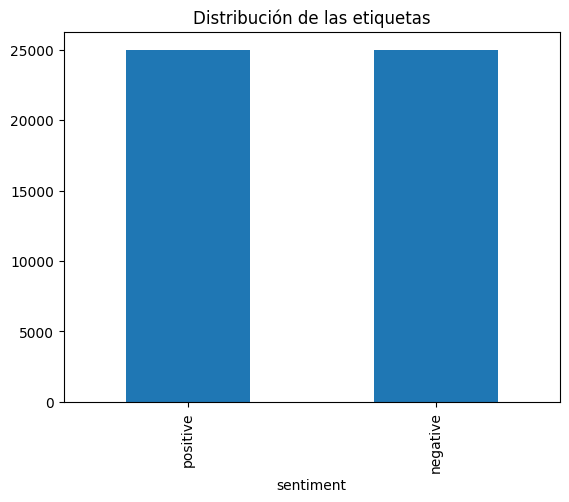

In [44]:
df.sentiment.value_counts().plot(kind='bar', title='Distribución de las etiquetas');

###transformar los textos en vectores

In [45]:
# separamos train y test
train, test = train_test_split(df, test_size=0.33)

## transformar el texto en vectores

In [46]:
# Separamos en X e y
train_y = train.iloc[:,0]
train_X = train.iloc[:,1].astype(str) # Convert train_X to string type
test_y = test.iloc[:,0]  ## y minuscula es vector
test_X = test.iloc[:,1].astype(str) # Convert test_X to string type  ## X mayuscula matriz

# Vectorizamos los textos por TF-IDF
vec = TfidfVectorizer(min_df=3)  ## instanciamos que considere palabras  aparezcan minimo 3 veces
model = MultinomialNB()  ## instanciar el naive
clf = make_pipeline(vec,model) ## entrenamos el modelo vector, modelo

clf = clf.fit(train_X, train_y) ## .fit clasificador ajustado  es rapido el modelo naive bayes rapido

In [47]:
test_X

,sentiment
30183,positive
43883,positive
22506,positive
7194,positive
47299,negative
...,...
10174,positive
13621,negative
35812,negative
20451,negative


In [48]:
predictions = clf.predict(test_X)

In [49]:
accuracy_score(test_y, predictions)

6.0606060606060605e-05

In [50]:
sum(predictions == test_y) / len(test_y)

6.0606060606060605e-05

In [51]:
accuracy_score(test_y, predictions)

6.0606060606060605e-05

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
df_cm = confusion_matrix(test_y,predictions,labels=test_y.unique())
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(test_y.unique(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(test_y.unique(), rotation=45, ha='right')
plt.ylabel('Valor Verdadero')
plt.xlabel('Valor Predicho');

## usar el modelo para hacer la prediccion

In [ ]:
to_predict = "Fue terrible la clase, el profesor se tom\xF3 una siesta y nos hizo usar machine learning para ver cu\xE1nto tiempo dorm\xEDa" #@param {type:"string"}
clf.predict([to_predict])[0]

## naive bayes distribucion binomial, vectorizacion por tf y df